In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/arvioa/bank_customer_churn_prediction/main/assets/train_data_customer_churn.csv',sep=",")
validation = pd.read_csv('https://raw.githubusercontent.com/arvioa/bank_customer_churn_prediction/main/assets/validation_data_customer_churn.csv')

In [3]:
train.shape

(7421, 15)

In [4]:
validation.shape

(1856, 15)

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Complain_0,7421.0,0.793559,0.404778,0.0,1.000000,1.000000,1.000000,1.0
Complain_1,7421.0,0.206441,0.404778,0.0,0.000000,0.000000,0.000000,1.0
Geography_France,7421.0,0.502223,0.500029,0.0,0.000000,1.000000,1.000000,1.0
Geography_Germany,7421.0,0.254009,0.435332,0.0,0.000000,0.000000,1.000000,1.0
Geography_Spain,7421.0,0.243768,0.429383,0.0,0.000000,0.000000,0.000000,1.0
IsActiveMember_0,7421.0,0.508557,0.499960,0.0,0.000000,1.000000,1.000000,1.0
IsActiveMember_1,7421.0,0.491443,0.499960,0.0,0.000000,0.000000,1.000000,1.0
Gender_Female,7421.0,0.452769,0.497798,0.0,0.000000,0.000000,1.000000,1.0
Gender_Male,7421.0,0.547231,0.497798,0.0,0.000000,1.000000,1.000000,1.0
Tenure,7421.0,0.499960,0.288417,0.0,0.200000,0.500000,0.700000,1.0


In [6]:
validation.describe().T

,count,mean,std,min,25%,50%,75%,max
Complain_0,1856.0,0.804957,0.396341,0.000000,1.000000,1.000000,1.000000,1.000000
Complain_1,1856.0,0.195043,0.396341,0.000000,0.000000,0.000000,0.000000,1.000000
Geography_France,1856.0,0.502694,0.500127,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,1856.0,0.246767,0.431246,0.000000,0.000000,0.000000,0.000000,1.000000
Geography_Spain,1856.0,0.250539,0.433440,0.000000,0.000000,0.000000,1.000000,1.000000
IsActiveMember_0,1856.0,0.510776,0.500019,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember_1,1856.0,0.489224,0.500019,0.000000,0.000000,0.000000,1.000000,1.000000
Gender_Female,1856.0,0.462284,0.498710,0.000000,0.000000,0.000000,1.000000,1.000000
Gender_Male,1856.0,0.537716,0.498710,0.000000,0.000000,1.000000,1.000000,1.000000
Tenure,1856.0,0.508082,0.290755,0.000000,0.300000,0.500000,0.800000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Complain_0         7421 non-null   int64  
 1   Complain_1         7421 non-null   int64  
 2   Geography_France   7421 non-null   int64  
 3   Geography_Germany  7421 non-null   int64  
 4   Geography_Spain    7421 non-null   int64  
 5   IsActiveMember_0   7421 non-null   int64  
 6   IsActiveMember_1   7421 non-null   int64  
 7   Gender_Female      7421 non-null   int64  
 8   Gender_Male        7421 non-null   int64  
 9   Tenure             7421 non-null   float64
 10  Age                7421 non-null   float64
 11  Balance            7421 non-null   float64
 12  EstimatedSalary    7421 non-null   float64
 13  CreditScore        7421 non-null   float64
 14  Exited             7421 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 869.8 KB


In [8]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Complain_0         1856 non-null   int64  
 1   Complain_1         1856 non-null   int64  
 2   Geography_France   1856 non-null   int64  
 3   Geography_Germany  1856 non-null   int64  
 4   Geography_Spain    1856 non-null   int64  
 5   IsActiveMember_0   1856 non-null   int64  
 6   IsActiveMember_1   1856 non-null   int64  
 7   Gender_Female      1856 non-null   int64  
 8   Gender_Male        1856 non-null   int64  
 9   Tenure             1856 non-null   float64
 10  Age                1856 non-null   float64
 11  Balance            1856 non-null   float64
 12  EstimatedSalary    1856 non-null   float64
 13  CreditScore        1856 non-null   float64
 14  Exited             1856 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 217.6 KB


In [9]:
train.head()

,Complain_0,Complain_1,Geography_France,Geography_Germany,Geography_Spain,IsActiveMember_0,IsActiveMember_1,Gender_Female,Gender_Male,Tenure,Age,Balance,EstimatedSalary,CreditScore,Exited
0,0,1,1,0,0,0,1,0,1,0.4,0.714286,0.403503,0.889106,0.674518,1
1,1,0,1,0,0,1,0,1,0,0.4,0.261905,0.000000,0.824055,0.241970,0
2,1,0,1,0,0,1,0,0,1,0.3,0.428571,0.000000,0.975201,1.000000,0
3,0,1,0,1,0,1,0,0,1,0.9,0.476190,0.267486,0.392813,0.492505,1
4,1,0,1,0,0,0,1,0,1,0.4,0.333333,0.000000,0.709124,0.417559,0


In [10]:
validation.head()

,Complain_0,Complain_1,Geography_France,Geography_Germany,Geography_Spain,IsActiveMember_0,IsActiveMember_1,Gender_Female,Gender_Male,Tenure,Age,Balance,EstimatedSalary,CreditScore,Exited
0,1,0,0,1,0,0,1,1,0,0.2,0.142857,0.436367,0.637807,0.479657,0
1,1,0,1,0,0,1,0,1,0,0.6,0.309524,0.349833,0.942614,0.922912,0
2,1,0,1,0,0,1,0,0,1,0.0,0.642857,0.000000,0.423299,0.254818,0
3,0,1,1,0,0,1,0,0,1,0.2,0.547619,0.506529,0.512006,0.511777,1
4,1,0,1,0,0,1,0,1,0,0.4,0.190476,0.564300,0.491535,0.871520,0


In [11]:
X = train.drop(['Exited'],axis=1)
y = train.Exited

# Set Baseline Model

In [12]:
def evaluate_baseline(model):
     scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
     scores = scores.mean()
     return scores

In [13]:
logisticModel = LogisticRegression()
logisticModelScore = evaluate_baseline(logisticModel)
print("Baseline LogisticRegression Model ROC-AUC Score: " + str(logisticModelScore))

Baseline LogisticRegression Model ROC-AUC Score: 0.9993267463625308


In [14]:
logisticModel = LogisticRegression()
dummyModel = DummyClassifier(strategy='most_frequent')
logisticModelScore = evaluate_baseline(logisticModel)
dummyModelScore = evaluate_baseline(dummyModel)
print("Baseline Dummy Model ROC_AUC Score: " + str(dummyModelScore))
print("Baseline LogisticRegression Model ROC-AUC Score: " + str(logisticModelScore))

Baseline Dummy Model ROC_AUC Score: 0.5
Baseline LogisticRegression Model ROC-AUC Score: 0.9993267463625308


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 19)

In [16]:
model_dict = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost" : XGBClassifier(),
    "CatBoost" : CatBoostClassifier(),
    "LGBM" : LGBMClassifier(),
    "KNN" : KNeighborsClassifier(n_neighbors=3),
    "LDA" : LinearDiscriminantAnalysis(), 
    "Gaussian": GaussianNB(),
    "Random Forest" : RandomForestClassifier(), 
    "SGD" : SGDClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
        }

In [18]:
scores = []
probability = {}
for model in model_dict:
  print("Model "+model + " score:")
  classifier = model_dict[model]
  classifier.fit(X_train, y_train)
  predicts = classifier.predict(X_test)
  try:
    score = classifier.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, score, average='weighted')
    probability[model] = score
  except:
    roc = 0

  scores.append([
                 model,
                 accuracy_score(y_test, predicts),
                 f1_score(y_test, predicts, average ='weighted'),
                 precision_score(y_test, predicts, average = 'weighted', zero_division = 1),
                 recall_score(y_test, predicts, average= 'weighted'),
                 roc
  ])

  print("Accuracy score : ", accuracy_score(y_test, predicts))
  print("F1 score : ", f1_score(y_test, predicts, average = 'weighted'))
  print("Precision score : ", precision_score(y_test, predicts, average = 'weighted', zero_division = 1))
  print("Recall score : ", recall_score(y_test, predicts, average = 'weighted'))
  print("ROC score : ", roc)
  print()

Model Logistic Regression score:
Accuracy score :  0.9993265993265993
F1 score :  0.9993261909923314
Precision score :  0.999327170005136
Recall score :  0.9993265993265993
ROC score :  0.998905131744527

Model Decision Tree score:
Accuracy score :  0.9973063973063973
F1 score :  0.9973063973063973
Precision score :  0.9973063973063973
Recall score :  0.9973063973063973
ROC score :  0.9958838497230953

Model XGBoost score:
Accuracy score :  0.9993265993265993
F1 score :  0.9993261909923314
Precision score :  0.999327170005136
Recall score :  0.9993265993265993
ROC score :  0.997092362531668

Model CatBoost score:
Learning rate set to 0.02204
0:	learn: 0.6248041	total: 168ms	remaining: 2m 47s
1:	learn: 0.5671671	total: 185ms	remaining: 1m 32s
2:	learn: 0.5074241	total: 196ms	remaining: 1m 5s
3:	learn: 0.4575742	total: 210ms	remaining: 52.3s
4:	learn: 0.4130057	total: 218ms	remaining: 43.4s
5:	learn: 0.3751113	total: 222ms	remaining: 36.9s
6:	learn: 0.3376223	total: 226ms	remaining: 32s


In [19]:
from sklearn.model_selection import cross_val_score

# Assuming you have your features in X and target variable in y
# X, y = ...

# Create your model (for example, Logistic Regression)
model = LogisticRegression()

# Perform 5-fold cross-validation and use 'roc_auc' as the scoring metric
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_dev = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_dev)

Cross-Validation Scores: [0.9996258  0.99877936 1.         0.99856783 0.99966073]
Mean Cross-Validation Score: 0.9993267463625308
Standard Deviation of Cross-Validation Scores: 0.0005531413606573722


In [20]:
new_table = pd.DataFrame(scores)
new_table = new_table.rename({0:'Model', 1: 'Accuracy', 2: 'F1', 3: 'Precision', 4: 'Recall', 5: 'ROC'}, axis = 1)
new_table = new_table.sort_values('ROC', ascending=False).reset_index(). drop('index', axis = 1)
new_table


,Model,Accuracy,F1,Precision,Recall,ROC
0,Logistic Regression,0.999327,0.999326,0.999327,0.999327,0.998905
1,Gaussian,0.999327,0.999326,0.999327,0.999327,0.998628
2,LGBM,0.999327,0.999326,0.999327,0.999327,0.998557
3,LDA,0.999327,0.999326,0.999327,0.999327,0.998403
4,KNN,0.999327,0.999326,0.999327,0.999327,0.998366
5,Random Forest,0.999327,0.999326,0.999327,0.999327,0.998250
6,Gradient Boosting,0.998653,0.998653,0.998653,0.998653,0.997142
7,XGBoost,0.999327,0.999326,0.999327,0.999327,0.997092
8,CatBoost,0.999327,0.999326,0.999327,0.999327,0.997076
9,Decision Tree,0.997306,0.997306,0.997306,0.997306,0.995884


# Model Evaluation

We would proceed with the Logistic Regression Model as it achieved highest ROC score amongst the models.

# Parameter Tuning

In order, to gain better scores from our model, we utilize parameter tuning to find the optimum hyperparameters for our model and assign it in order to achieve the best results.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search through
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Create the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Perform the grid search on your data (X, y are your features and target)
grid_search.fit(X, y)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

In [22]:
print("Best Parameters: ", best_params)
print("Best ROC AUC Score: ", best_score)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score:  0.999394114989449


Now, we tune the logistic regression model and retrain the model

In [23]:
log_tuned = LogisticRegression(
    C = 1
    ,penalty = 'l1'
    ,solver = 'liblinear'
)

In [24]:
log_tuned.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [25]:
def printScore(model):
  score = model.predict_proba(X_test)[:, 1]
  pred = model.predict(X_test)
  roc = roc_auc_score(y_test, score, average = 'weighted')
  print("Accuracy score : ", accuracy_score(y_test, pred))
  print("F1 score : ", f1_score(y_test, pred, average = 'weighted'))
  print("Precision score : ", precision_score(y_test, pred, average = 'weighted', zero_division=1))
  print("Recall score : ", recall_score(y_test, pred, average = 'weighted',zero_division=1))
  print("ROC score : ", roc)
  print(classification_report(y_test, pred))  
  return score, pred, roc

In [26]:
proba_score, pred_list, roc_score= printScore(log_tuned) #First try

Accuracy score :  0.9993265993265993
F1 score :  0.9993261909923314
Precision score :  0.999327170005136
Recall score :  0.9993265993265993
ROC score :  0.9986501244546447
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1179
           1       1.00      1.00      1.00       306

    accuracy                           1.00      1485
   macro avg       1.00      1.00      1.00      1485
weighted avg       1.00      1.00      1.00      1485



In [27]:
#As we take the predict_proba[1], we will substract 1 by the roc score, becoming the new threshold for the response "1"
threshold = 1 - roc_score
threshold

0.0013498755453552613

In [28]:
proba_score

array([0.00063069, 0.00024995, 0.00036234, ..., 0.00059965, 0.00181552,
       0.00478886])

In [29]:
new_pred = [1 if i > threshold else 0  for i in proba_score]

In [30]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1179
           1       0.59      1.00      0.74       306

    accuracy                           0.86      1485
   macro avg       0.79      0.91      0.82      1485
weighted avg       0.91      0.86      0.87      1485



In [31]:
print(confusion_matrix(y_test,new_pred))

[[966 213]
 [  1 305]]


In [32]:
pip install plot_roc_curve

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plot_roc_curve
ERROR: No matching distribution found for plot_roc_curve


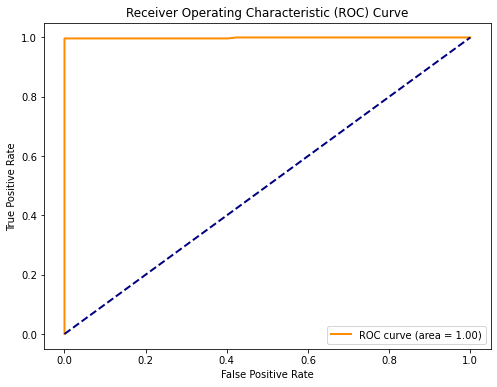

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming log_tuned is your tuned Logistic Regression model
log_tuned.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = log_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


SHAP values for the first instance: [-0.90341521 -0.90340958  0.0429274   0.04641629 -0.02990377  0.2294157
  0.22943426 -0.03609283 -0.03610808 -0.00490219 -0.32700823 -0.07892903
 -0.09280199 -0.02207225]


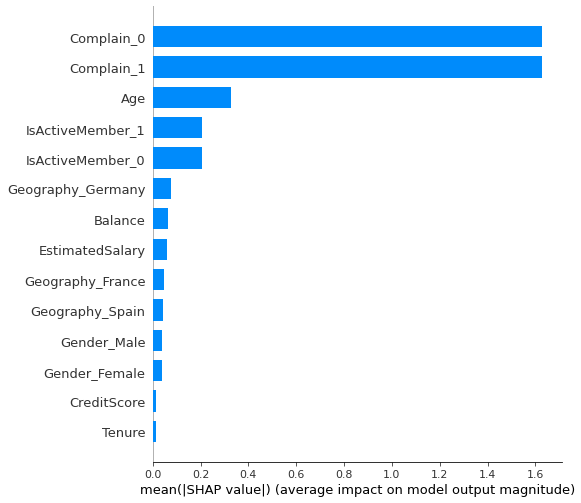

In [56]:
import shap
from sklearn.linear_model import LogisticRegression

# Assuming you have your features in X_train and the corresponding target variable in y_train

# Train your logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Use LinearExplainer
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Print out the SHAP values for the first instance in your training data
print("SHAP values for the first instance:", shap_values[0])

#plot shap_summary
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Predicting on validation dataset

In [34]:
X_val = validation.drop('Exited', axis = 1)
y_val = validation['Exited']

In [35]:
X_train.shape

(5936, 14)

In [36]:
X_val.shape

(1856, 14)

In [37]:
y_val.shape

(1856,)

In [42]:
def predictVal(model, X_val, y_val):
  score = model.predict_proba(X_val)[:, 1]
  pred = model.predict(X_val)
  roc = roc_auc_score(y_val, score, average = 'weighted')
  print("Accuracy score : ", accuracy_score(y_val, pred))
  print("F1 score : ", f1_score(y_val, pred, average = 'weighted'))
  print("Precision score : ", precision_score(y_val, pred, average = 'weighted', zero_division = 1))
  print("Recall score : ", recall_score(y_val, pred, average = 'weighted', zero_division = 1))
  print("ROC score : ", roc)
  return score, pred, roc

In [43]:
finalScore, finalPred, finalROC = predictVal(log_tuned, X_val, y_val)

Accuracy score :  0.9989224137931034
F1 score :  0.9989235458980503
Precision score :  0.9989283673080587
Recall score :  0.9989224137931034
ROC score :  0.9996648469994058


In [45]:
confusion_matrix(y_val, finalPred, labels =[0, 1])

array([[1494,    2],
       [   0,  360]], dtype=int64)

In [46]:
unseenPred = [1 if i > threshold else 0 for i in finalScore]

In [47]:
a = confusion_matrix(y_val, unseenPred)
a

array([[1217,  279],
       [   0,  360]], dtype=int64)

In [51]:
churnPrediction = 360+279
unchurnPrediction = 0+1217
total = len(unseenPred)
optimizedCost = (total-churnPrediction) / Total * 100
print("The amount of expenses saved using machine learning: " + str(round(optimizedCost,2)) + "%")
print(churnPrediction)

The amount of expenses saved using machine learning: 65.57%
639


In [50]:
print(classification_report(y_val, unseenPred, labels=[0,1], zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      1496
           1       0.56      1.00      0.72       360

    accuracy                           0.85      1856
   macro avg       0.78      0.91      0.81      1856
weighted avg       0.92      0.85      0.86      1856



In the case of predicting customer churn, recall  is crucial for businesses or in this case the bank, because identifying all potential churn cases allows for targeted retention efforts. If our recall is low, we might miss identifying a significant portion of customers who are likely to leave, leading to missed opportunities to retain them.